In [1]:
import numpy as np
from tqdm import tqdm
from time import sleep
import pygad
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
"""klucz: [nazwa, wartość, waga]"""
domek = {
    1: ['zegar', 100, 7],
    2: ['obraz pejzaż', 300, 7],
    3: ['obraz portret', 200, 6],
    4: ['radio', 40, 2],
    5: ['laptop', 500, 5],
    6: ['lampka nocna', 70, 6],
    7: ['srebrne sztućce', 100, 1],
    8: ['porcelana', 250, 3],
    9: ['figurka z brązu', 300, 10],
    10: ['skórzana torebka', 280, 3],
    11: ['odkurzacz', 300, 15]
}

Maksymalna waga do uniesienia - 25.

Jakie przedmioty należy ukraść, aby w ramach limitu wagi uzyskać jak największą wartość?

In [3]:
max_weight = 25

In [4]:
2 ** 11

2048

In [5]:
przedmioty_wartosc = []
przedmioty_waga = []
for index in range(11):
    key = index + 1    
    przedmioty_wartosc.append(domek.get(key)[1])
    przedmioty_waga.append(domek.get(key)[2])

print(f"Wartość wszystkich przedmiotów to {np.sum(przedmioty_wartosc)} i ważą one {np.sum(przedmioty_waga)}")

Wartość wszystkich przedmiotów to 2440 i ważą one 65


Definiujemy funkcje fitnessu:

In [6]:
def fit_fun_not_norm(genetic_algorithm_instance, solution, solution_idx):
    weight = 0
    fitness_value = 0
    
    for index in range(len(solution)):
        key = index + 1
        if solution[index] == 1:
            fitness_value += domek.get(key)[1]
            weight += domek.get(key)[2]
            if weight > max_weight:
                fitness_value -= np.sum(przedmioty_wartosc)  # 2440
    
    return fitness_value

In [7]:
def fit_fun_norm(genetic_algorithm_instance, solution, solution_idx):
    weight = 0
    fitness_value = 0
    
    for index in range(len(solution)):
        key = index + 1
        if solution[index] == 1:
            fitness_value += domek.get(key)[1]
            weight += domek.get(key)[2]
            if weight > max_weight:
                fitness_value = 0
    
    fitness_value = fitness_value / np.sum(przedmioty_wartosc)  # fitness_value = fitness_value / 2440
    
    return fitness_value

Przykład z tqdm:

In [ ]:
a = 0
for _ in tqdm(range(10)):
    a += 1
    print(a)
    sleep(3)
print(a)

**Wracamy do algorytmów genetycznych:**

Ustawienia "globalne" naszego algorytmu:

In [9]:
gene_space=[0, 1]
num_generations=100
num_parents_mating=15
sol_per_pop=40
num_genes=11
parent_selection_type="tournament"
keep_parents=5
crossover_type="single_point"
mutation_type="random"
mutation_probability=0.02

Przypadek z nieznormalizowaną funkcją fitnessu:

In [23]:
"""Puste listy do zapamiętania wyników:"""
solution_list_not_norm = []
solution_fitness_list_not_norm = []

"""Uruchomienie algorytmu w pętli:"""
for _ in tqdm(range(100)):
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fit_fun_not_norm,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_probability=mutation_probability
    )
    
    ga_instance.run()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    solution_list_not_norm.append(solution)
    solution_fitness_list_not_norm.append(solution_fitness)

solution_list_not_norm = np.array(solution_list_not_norm)
solution_fitness_list_not_norm = np.array(solution_fitness_list_not_norm)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
100%|██████████| 100/100 [00:10<00:00,  9.48it/s]


Przypadek ze znormalizowaną funkcją fitnessu:

In [24]:
"""Puste listy do zapamiętania wyników:"""
solution_list_norm = []
solution_fitness_list_norm = []

"""Uruchomienie algorytmu w pętli:"""
for _ in tqdm(range(100)):
    ga_instance = pygad.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fit_fun_norm,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_probability=mutation_probability
    )
    
    ga_instance.run()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    solution_list_norm.append(solution)
    solution_fitness_list_norm.append(solution_fitness)

solution_list_norm = np.array(solution_list_norm)
solution_fitness_list_norm = np.array(solution_fitness_list_norm)

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Jakub\AppData\Local\Programs\Python\Python312\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")
100%|██████████| 100/100 [00:10<00:00,  9.41it/s]


Porównujemy historię fitnessu dla obydwu funkcji:

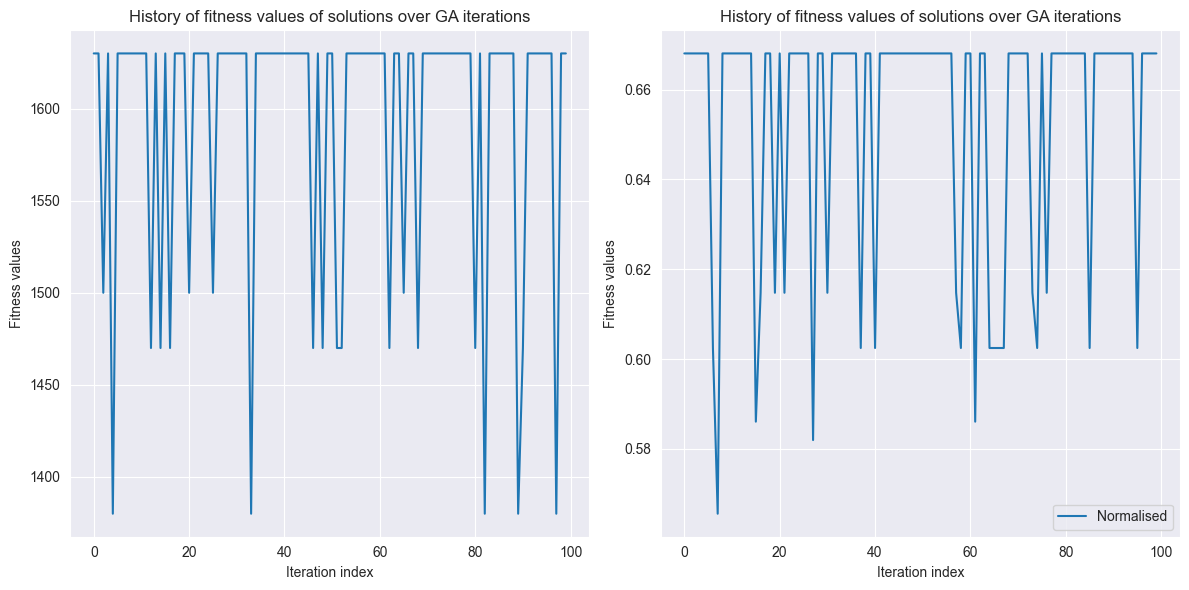

In [25]:
fig = plt.figure(figsize=(12,6))

"""Nieznormalizowana:"""
ax1 = fig.add_subplot(121)  # 1x2 grid, pos. 1
ax1.plot(solution_fitness_list_not_norm, label='Not normalised')
ax1.set_title('History of fitness values of solutions over GA iterations')
ax1.set_xlabel('Iteration index')
ax1.set_ylabel('Fitness values')

"""Znormalizowana:"""
ax1 = fig.add_subplot(122)  # 1x2 grid, pos. 2
ax1.plot(solution_fitness_list_norm, label='Normalised')
ax1.set_title('History of fitness values of solutions over GA iterations')
ax1.set_xlabel('Iteration index')
ax1.set_ylabel('Fitness values')

plt.legend()
plt.tight_layout()
plt.show()

Tworzymy data frame:

In [26]:
data_fitness = pd.DataFrame(
    data={
        'normalised': solution_fitness_list_norm,
        'not normalised': solution_fitness_list_not_norm / np.sum(przedmioty_wartosc)
    }
)
data_fitness.sample(10)

,normalised,not normalised
43,0.668033,0.668033
20,0.668033,0.614754
90,0.668033,0.602459
54,0.668033,0.668033
29,0.668033,0.668033
55,0.668033,0.668033
56,0.668033,0.668033
18,0.668033,0.668033
26,0.668033,0.668033
81,0.668033,0.668033


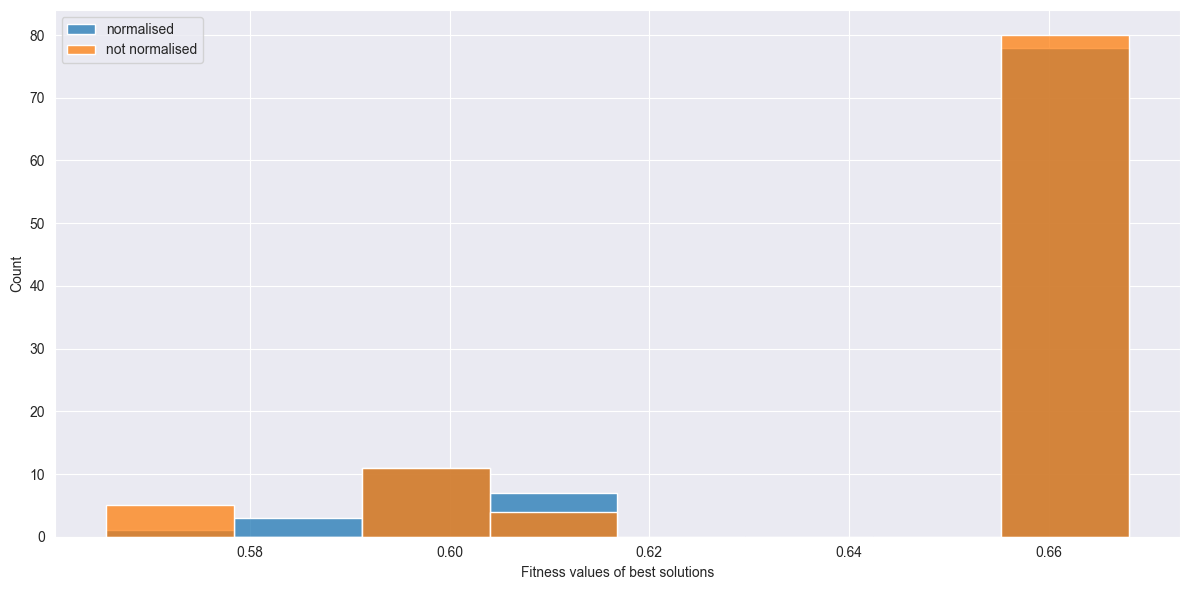

In [27]:
plt.figure(figsize=(12,6))

hist1 = sns.histplot(data=data_fitness, x='normalised', label='normalised')
hist1.set(xlabel='Fitness values of best solutions')
hist2 = sns.histplot(data=data_fitness, x='not normalised', label='not normalised')

plt.legend()
plt.tight_layout()
plt.show()

Sprawdźmy parametry rozwiązań o maksymalnej wartości fitnessu:

In [29]:
best_solutions = []
for index in range(len(solution_fitness_list_not_norm)):
    if solution_fitness_list_not_norm[index] == 1630:
        best_solutions.append(solution_list_not_norm[index])

In [30]:
len(best_solutions)

80

In [37]:
first_sol = best_solutions[0]
unique_solutions = [first_sol]
for index in range(len(best_solutions) - 1):
    current_sol = best_solutions[index + 1]
    result = [a == b for a, b in zip(first_sol, current_sol)]
    if not all(result):
        unique_solutions.append(current_sol)

In [38]:
len(unique_solutions)

1

In [39]:
first_sol

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.])

In [40]:
plecak = []
index = 1
for choice in first_sol:
    if int(choice) == 1:
        plecak.append(domek.get(index)[0])
    index += 1
plecak

['obraz pejzaż',
 'obraz portret',
 'laptop',
 'srebrne sztućce',
 'porcelana',
 'skórzana torebka']